# Clash of Clans CWL

## Regressions

* Your Name: Nolan Clark
* Name of API: Clash of Clans API
* Link to main page of API documentation: https://developer.clashofclans.com/#/documentation

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv("JulyModelDF.csv",index_col=0, keep_default_na=False, na_values='')
clans_extra = pd.read_csv("JulyCWLgroupPerformanceDF.csv",index_col=0, keep_default_na=False, na_values='')
clans=df.groupby(['clan_tag','league','result','group_rank']).sum().reset_index()

/Users/Nolan/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
master1 =df[df.league == 'Master League I']
m_clans =master1.groupby(['clan_tag','league','result','group_rank']).sum().reset_index()

In [4]:
league_order = [ 'Gold League III',
                'Gold League II',
                'Gold League I',
                'Crystal League III',
                'Crystal League II',
                'Crystal League I',
                'Master League III',
                'Master League II',
                'Master League I',
                'Champion League III',
                'Champion League II',
                'Champion League I'
               ]

league_map = {x[1]:x[0] for x in enumerate(league_order)}

result_map = {'PROMOTED':0,
              'REMAINED':1,
              'DROPPED':2}

In [5]:
clans['league_mapped']=clans['league'].map(league_map)
clans['result_mapped']=clans['result'].map(result_map)

m_clans['league_mapped']=m_clans['league'].map(league_map)
m_clans['result_mapped']=m_clans['result'].map(result_map)

In [6]:
july = pd.read_csv("CC_July.csv",index_col=0, keep_default_na=False, na_values='')
july.rename(columns={'rank':'group_rank'}, inplace = True)
coop=july[july['clan_tag'] == '#2QVRL0RR']
july_extra = pd.read_csv("CC_July_Performance.csv",index_col=0, keep_default_na=False, na_values='')
july_extra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   clan_tag         8 non-null      object 
 1   group_num        8 non-null      int64  
 2   Tot_Clan_Damage  8 non-null      float64
 3   Tot_Clan_Stars   8 non-null      int64  
 4   group_rank       8 non-null      float64
 5   result           8 non-null      object 
dtypes: float64(2), int64(2), object(2)
memory usage: 448.0+ bytes


In [7]:
clans_extra_plus=clans_extra.merge(clans[['clan_tag','league_mapped','result_mapped']], on ='clan_tag')

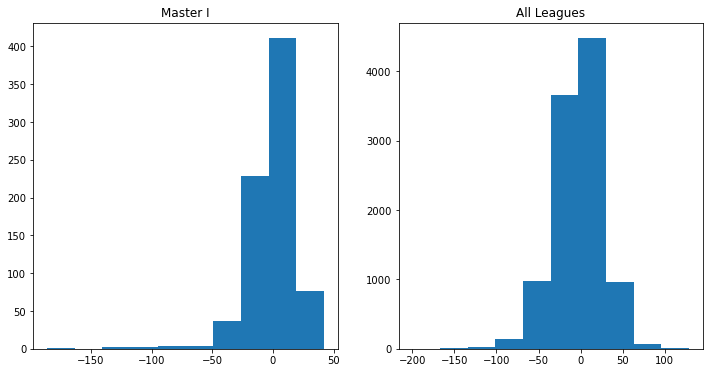

In [8]:
# Master I is tighter on spread compared to all leagues
plt.figure(figsize = (12,6))
ax1=plt.subplot(1,2,1)
ax1.hist(m_clans.star_diff)
ax1.set_title('Master I')
ax2=plt.subplot(1,2,2)
ax2.hist(clans.star_diff)
ax2.set_title('All Leagues')
plt.show()

In [9]:
clans.groupby('league')['league'].count()

league
Champion League I       104
Champion League II      376
Champion League III     584
Crystal League I       2392
Crystal League II      1440
Crystal League III      992
Gold League I           504
Gold League II          240
Gold League III          48
Master League I         768
Master League II       1008
Master League III      1872
Name: league, dtype: int64

## Linear Regression

In [10]:
def myfunc(x):
    return slope * x + intercept

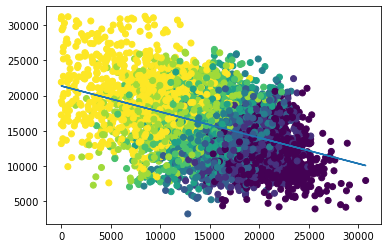

R^2: -0.4072195002169942


In [11]:
slope,intercept,r,p,std_err = stats.linregress(clans.attack_trans,clans.def_trans)
mymodel=list(map(myfunc,clans.attack_trans))

plt.scatter(data=clans, x='attack_trans',y='def_trans', c='group_rank')
plt.plot(clans.attack_trans,mymodel)
plt.show()
print('R^2:',r)

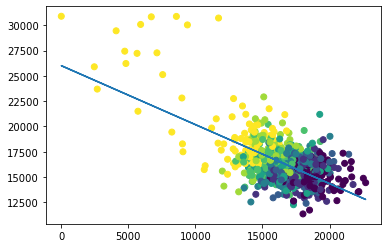

R^2: -0.6255461464686208


In [12]:
slope,intercept,r,p,std_err = stats.linregress(m_clans.attack_trans,m_clans.def_trans)
mymodel=list(map(myfunc,m_clans.attack_trans))

plt.scatter(data=m_clans, x='attack_trans',y='def_trans', c='group_rank')
plt.plot(m_clans.attack_trans,mymodel)
plt.show()
print('R^2:',r)

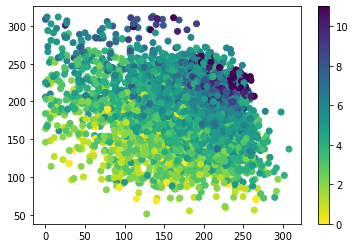

In [13]:
plt.scatter(data=clans, x='A_stars',y='D_stars',c='league_mapped', cmap='viridis_r')
plt.colorbar()

In [14]:
slope,intercept,r,p,std_err = stats.linregress(clans.A_stars,clans.group_rank)
mymodel=list(map(myfunc,clans.A_stars))

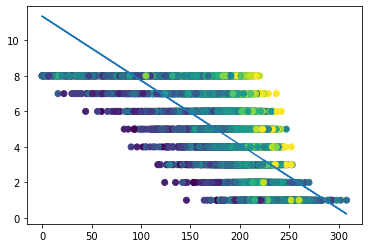

R^2: -0.6703609103891678


In [15]:
plt.scatter(data=clans, x='A_stars',y='group_rank', c='league_mapped')
plt.plot(clans.A_stars,mymodel)
plt.show()
print('R^2:',r)

In [16]:
slope,intercept,r,p,std_err = stats.linregress(clans_extra_plus.Tot_Clan_Stars,clans_extra_plus.group_rank)
mymodel=list(map(myfunc,clans_extra_plus.Tot_Clan_Stars))

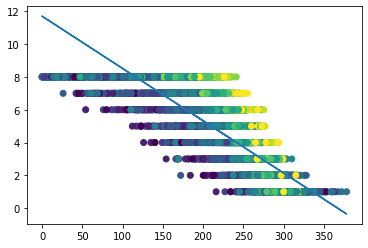

R^2: -0.8283369067899129


In [17]:
plt.scatter(data=clans_extra_plus, x='Tot_Clan_Stars',y='group_rank', c='league_mapped')
plt.plot(clans_extra_plus.Tot_Clan_Stars,mymodel)
plt.show()
print('R^2:',r)

In [18]:
slope,intercept,r,p,std_err = stats.linregress(m_clans.A_stars,m_clans.group_rank)
mymodel=list(map(myfunc,m_clans.A_stars))

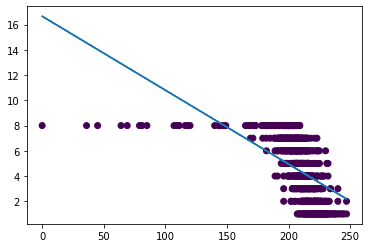

R^2: -0.5828832513065223


In [19]:
plt.scatter(data=m_clans, x='A_stars',y='group_rank', c='league_mapped')
plt.plot(m_clans.A_stars,mymodel)
plt.show()
print('R^2:',r)

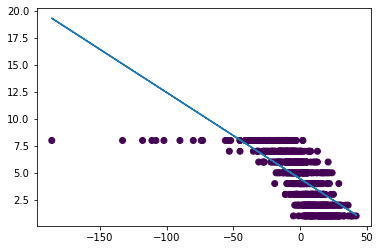

R^2: -0.6962158638542452


In [20]:
slope,intercept,r,p,std_err = stats.linregress(m_clans.star_diff,m_clans.group_rank)
mymodel=list(map(myfunc,m_clans.star_diff))

plt.scatter(data=m_clans, x='star_diff',y='group_rank', c='league_mapped')
plt.plot(m_clans.star_diff,mymodel)
plt.show()
print('R^2:',r)

## Multiple Regression

In [21]:
predictor_vars = ['A_stars','D_stars', 'A_Percent','D_Percent']
response_var = 'group_rank'

x=m_clans[predictor_vars]
y=m_clans[response_var]

regr = linear_model.LinearRegression()
regr.fit(x,y)

LinearRegression()

In [22]:

who=coop.groupby(['clan','group_rank']).sum().reset_index()
regr.predict(who[predictor_vars])

print(mean_squared_error(who.group_rank,regr.predict(who[predictor_vars])))
print(mean_absolute_error(who.group_rank,regr.predict(who[predictor_vars])))

0.8060596228392745
0.8978082327753931


In [24]:
predictor_vars = ['Tot_Clan_Damage','Tot_Clan_Stars']
response_var = 'group_rank'
x=clans_extra[predictor_vars]
y=clans_extra[response_var]
regr = linear_model.LinearRegression()
regr.fit(x,y)

preds=regr.predict(july_extra[predictor_vars])
print(preds)

[1.31339608 5.99647575 3.49660729 6.14784686 4.9953578  7.14728582
 3.70766202 2.52377884]


In [31]:
# Actual rankings mostly match predicted. 6th/7th place very close
print(list(july_extra.group_rank))
print([round(x,1) for x in preds])

[1.0, 6.0, 3.0, 7.0, 5.0, 8.0, 4.0, 2.0]
[1.3, 6.0, 3.5, 6.1, 5.0, 7.1, 3.7, 2.5]


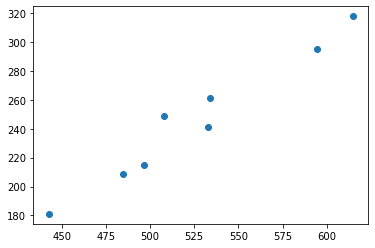

In [33]:
plt.scatter(data = july_extra, x='Tot_Clan_Damage',y='Tot_Clan_Stars')

## Logistic Regression

Scores well with modeling demotions -- which is the least favorited outcome.

In [53]:
clans['keep_league']=clans['result'].map(lambda x: 1 if x == 'REMAINED' else 0)
clans['demoted_mapped']=clans['group_rank'].map(lambda x: 1 if x >= 7 else 0)

m_clans['keep_league']=m_clans['result'].map(lambda x: 1 if x == 'REMAINED' else 0)
m_clans['demoted_mapped']=m_clans['group_rank'].map(lambda x: 1 if x >= 7 else 0)

In [101]:
# Predicting if avoiding promotion or demotion

train,test = train_test_split(clans, test_size=0.25)

logr = linear_model.LogisticRegression()

X= ['star_diff','attack_trans','def_trans','league_mapped']
y= 'keep_league'


logr.fit(train[X], train[y])

predicted=logr.predict(test[X])
actual=test[y]

cm = metrics.confusion_matrix(actual,predicted)

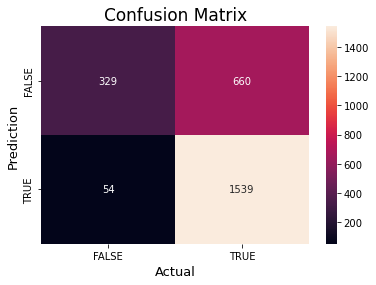

Accuracy   : 0.7234701781564679
Precision : 0.7608216191630495
Recall    : 0.7234701781564679
F1-score  : 0.684495949543178


In [102]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['FALSE','TRUE'],
            yticklabels=['FALSE','TRUE']
           )
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
#finding precision and recall
accuracy = metrics.accuracy_score(actual,predicted)
print("Accuracy   :", accuracy)
precision = metrics.precision_score(actual,predicted,average='weighted')
print("Precision :", precision)
recall = metrics.recall_score(actual,predicted,average='weighted')
print("Recall    :", recall)
F1_score = metrics.f1_score(actual,predicted,average='weighted')
print("F1-score  :", F1_score)

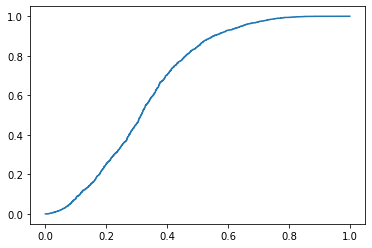

AUC score: 0.6735134511405214


In [103]:
# Good AUC - ROC Curve for model accuracy
y_score =logr.predict_proba(train[X])[:,1]

fpr, tpr, thresholds = roc_curve(train[y], y_score)
plt.plot(fpr,tpr)
plt.show()
print('AUC score:',roc_auc_score(train[y], y_score))

In [104]:
# Predicting if avoiding demotion

train,test = train_test_split(clans, test_size=0.25)

logr = linear_model.LogisticRegression()

X= ['star_diff','attack_trans','def_trans','league_mapped']
y= 'demoted_mapped'


logr.fit(train[X], train[y])

predicted=logr.predict(test[X])
actual=test[y]

cm = metrics.confusion_matrix(actual,predicted)

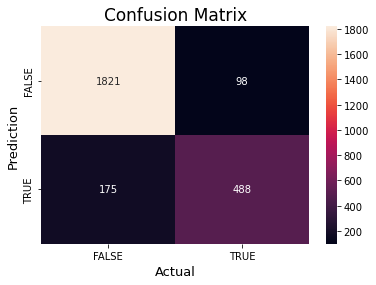

Accuracy   : 0.8942680092951201
Precision : 0.8918953791240148
Recall    : 0.8942680092951201
F1-score  : 0.8920486220851346


In [105]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['FALSE','TRUE'],
            yticklabels=['FALSE','TRUE']
           )
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
#finding precision and recall
accuracy = metrics.accuracy_score(actual,predicted)
print("Accuracy   :", accuracy)
precision = metrics.precision_score(actual,predicted,average='weighted')
print("Precision :", precision)
recall = metrics.recall_score(actual,predicted,average='weighted')
print("Recall    :", recall)
F1_score = metrics.f1_score(actual,predicted,average='weighted')
print("F1-score  :", F1_score)

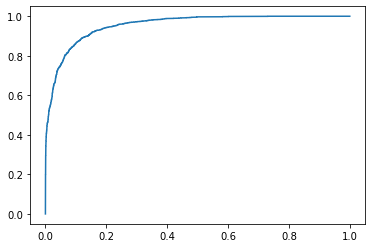

AUC score: 0.95480438092855


In [106]:
# Good AUC - ROC Curve for model accuracy
y_score =logr.predict_proba(train[X])[:,1]

fpr, tpr, thresholds = roc_curve(train[y], y_score)
plt.plot(fpr,tpr)
plt.show()
print('AUC score:',roc_auc_score(train[y], y_score))

In [107]:
# Predicting if avoiding promotion or demotion

train,test = train_test_split(m_clans, test_size=0.25)

logr = linear_model.LogisticRegression()

X= ['star_diff','attack_trans','def_trans','league_mapped']
y= 'keep_league'


logr.fit(train[X], train[y])

predicted=logr.predict(test[X])
actual=test[y]

cm = metrics.confusion_matrix(actual,predicted)

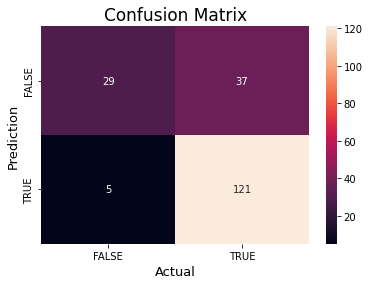

Accuracy   : 0.78125
Precision : 0.7957697319434103
Recall    : 0.78125
F1-score  : 0.7585739436619718


In [108]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['FALSE','TRUE'],
            yticklabels=['FALSE','TRUE']
           )
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
#finding precision and recall
accuracy = metrics.accuracy_score(actual,predicted)
print("Accuracy   :", accuracy)
precision = metrics.precision_score(actual,predicted,average='weighted')
print("Precision :", precision)
recall = metrics.recall_score(actual,predicted,average='weighted')
print("Recall    :", recall)
F1_score = metrics.f1_score(actual,predicted,average='weighted')
print("F1-score  :", F1_score)

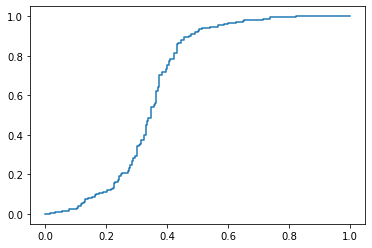

AUC score: 0.6586883493663155


In [109]:
# Good AUC - ROC Curve for model accuracy
y_score =logr.predict_proba(train[X])[:,1]

fpr, tpr, thresholds = roc_curve(train[y], y_score)
plt.plot(fpr,tpr)
plt.show()
print('AUC score:',roc_auc_score(train[y], y_score))

In [110]:
train,test = train_test_split(m_clans, test_size=0.20)

logr = linear_model.LogisticRegression()

X= ['A_stars','D_stars','star_diff']
y= 'demoted_mapped'


logr.fit(train[X], train[y])

predicted=logr.predict(test[X])
actual=test[y]

cm = metrics.confusion_matrix(actual,predicted)

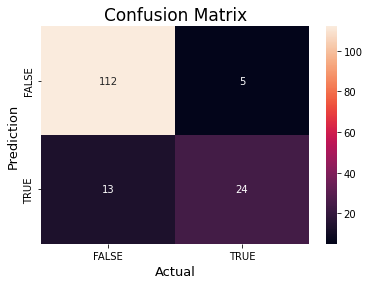

Accuracy   : 0.8831168831168831
Precision : 0.8795629198387821
Recall    : 0.8831168831168831
F1-score  : 0.8779650101964152


In [111]:
# Logistic Regression: Will the clan be demoted? ~ one error per cwl group at 0.875
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['FALSE','TRUE'],
            yticklabels=['FALSE','TRUE']
           )
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
#finding precision and recall
accuracy = metrics.accuracy_score(actual,predicted)
print("Accuracy   :", accuracy)
precision = metrics.precision_score(actual,predicted,average='weighted')
print("Precision :", precision)
recall = metrics.recall_score(actual,predicted,average='weighted')
print("Recall    :", recall)
F1_score = metrics.f1_score(actual,predicted,average='weighted')
print("F1-score  :", F1_score)

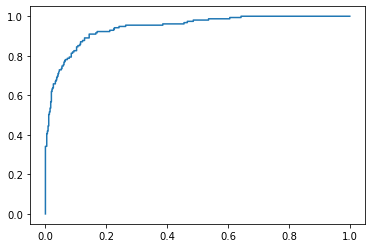

AUC score: 0.9432918687188138


In [112]:
# Good AUC - ROC Curve for model accuracy
y_score =logr.predict_proba(train[X])[:,1]

fpr, tpr, thresholds = roc_curve(train[y], y_score)
plt.plot(fpr,tpr)
plt.show()
print('AUC score:',roc_auc_score(train[y], y_score))